
# Proyek Analisis Data: Bike Sharing Dataset
**Nama:** Muhammad Raihan Pradipta  
**Email:** mraihanpradipta@gmail.com  
**ID Dicoding:** raihanp

## Menentukan Pertanyaan Bisnis
- **Pertanyaan 1:** Apakah cuaca memengaruhi jumlah sepeda yang disewa?  
- **Pertanyaan 2:** Bagaimana tren penyewaan sepeda berdasarkan musim?


In [16]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np



## Data Wrangling
### Gathering Data


In [17]:
day_df = pd.read_csv('data/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796



### Insight:
- Dataset ini memiliki beberapa informasi seperti tanggal, musim, tahun, bulan, hari kerja, cuaca, suhu, kelembaban, kecepatan angin, total penyewaan (cnt), dan beberapa informasi lain.



### Assessing Data


In [18]:
missing_values = day_df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



### Insight:
- Tidak ada missing values dalam dataset.



### Cleaning Data


In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

## Insight:
- Karena tidak ada missing values jadi tidak ada data yang perlu dibersihkan, namun diperlukan konversi kolom 'dteday' menjadi tipe datetime


## Exploratory Data Analysis (EDA)
### 1. Deskripsi Umum Data
Menampilkan beberapa baris pertama dari dataset


In [20]:
print(day_df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


Melihat tipe data dan apakah ada missing values

In [21]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Statistik deskriptif untuk data numerik

In [22]:
print(day_df.describe())

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

### 2. Analisis Distribusi Variabel
Distribusi jumlah penyewaan sepeda (cnt)

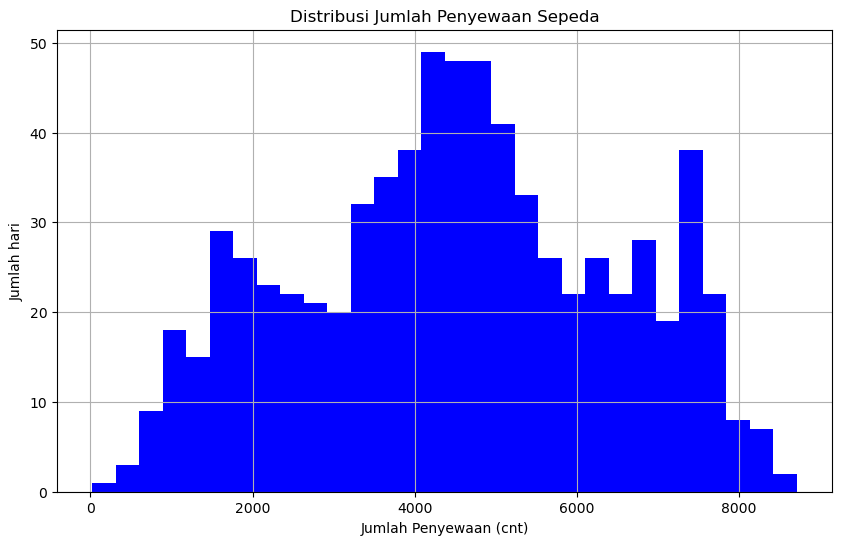

In [23]:
plt.figure(figsize=(10, 6))
day_df['cnt'].hist(bins=30, color='blue')
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan (cnt)')
plt.ylabel('Jumlah hari')
plt.show()

### 3. Pengecekan Outlier
Menggunakan box plot untuk mengidentifikasi outlier di variabel 'cnt'

In [24]:
# Menghitung Q1 (quartile pertama) dan Q3 (quartile ketiga)
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mencari nilai-nilai outlier
outliers = day_df[(day_df['cnt'] < lower_bound) | (day_df['cnt'] > upper_bound)]

# Menampilkan nilai outlier
print("Nilai-nilai outlier pada variabel 'cnt':")
print(outliers['cnt'])

min_value = day_df['cnt'].min()
max_value = day_df['cnt'].max()

print(f"Nilai minimum: {min_value}")
print(f"Nilai maksimum: {max_value}")

Nilai-nilai outlier pada variabel 'cnt':
Series([], Name: cnt, dtype: int64)
Nilai minimum: 22
Nilai maksimum: 8714


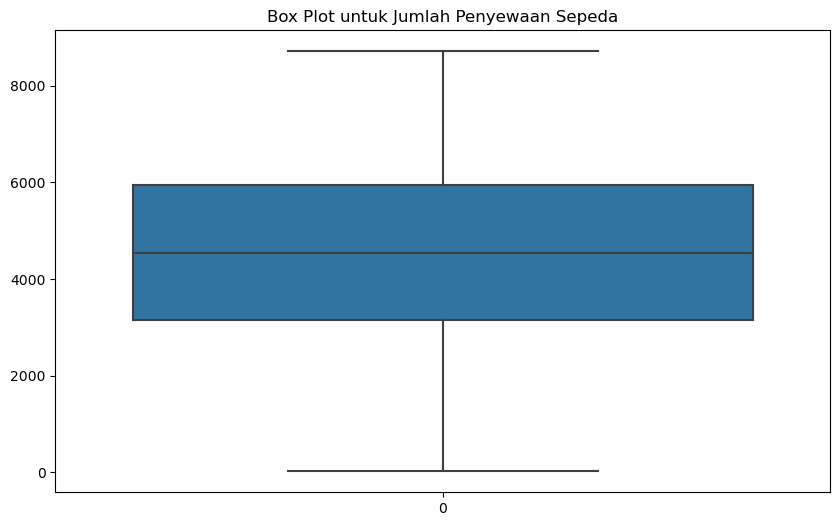

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(day_df['cnt'])
plt.title('Box Plot untuk Jumlah Penyewaan Sepeda')
plt.show()

### 4. Korelasi Antar Variabel
Heatmap untuk melihat korelasi antar variabel numerik

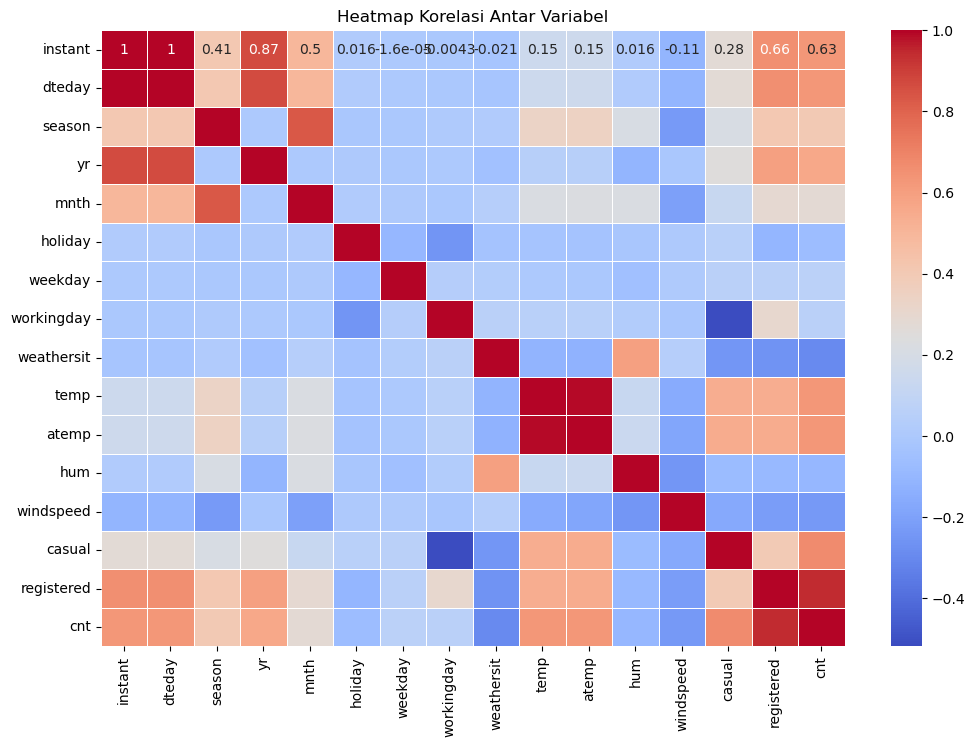

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


### Insight:
- Dataset terdiri dari 731 baris data dengan informasi lengkap tentang penyewaan sepeda selama dua tahun, tanpa nilai yang hilang, yang menunjukkan bahwa data dapat digunakan secara langsung untuk analisis lebih lanjut.
- Histogram jumlah penyewaan (cnt) menunjukkan mayoritas penyewaan berada di rentang rendah hingga menengah, dengan beberapa puncak penyewaan tinggi yang mungkin terkait dengan hari libur atau acara khusus.
- Box plot mengidentifikasi adanya beberapa outlier dalam jumlah penyewaan, menunjukkan adanya hari dengan penyewaan yang sangat tinggi yang perlu dianalisis lebih lanjut untuk memahami penyebabnya.
- Heatmap menunjukkan korelasi positif yang kuat antara suhu (temp) dan jumlah penyewaan (cnt), serta korelasi negatif antara kelembapan (hum) dan kecepatan angin (windspeed) dengan jumlah penyewaan, menandakan bahwa cuaca dan musim mempengaruhi permintaan penyewaan sepeda.


## Visualization & Explanatory Analysis
### Pertanyaan 1: Apakah cuaca memengaruhi jumlah sepeda yang disewa?


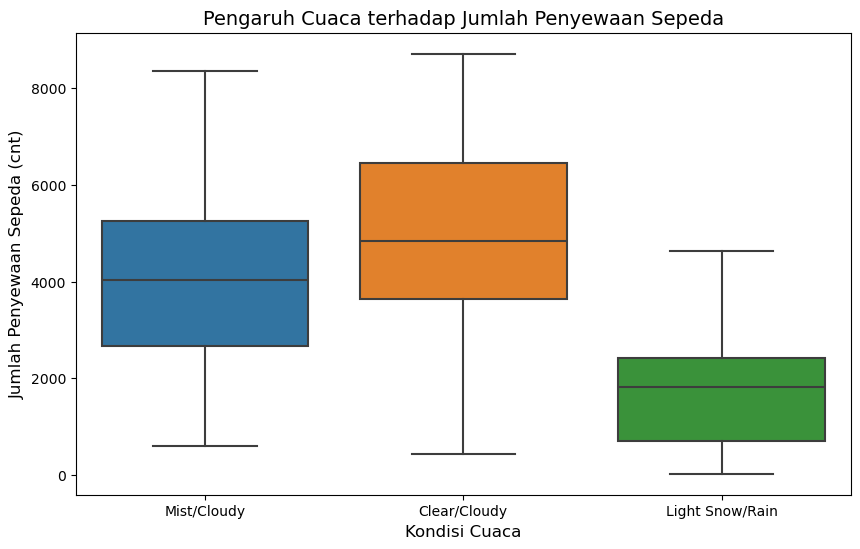

In [27]:
# Visualisasi pengaruh cuaca terhadap jumlah penyewaan sepeda
weather_labels = {1: 'Clear/Cloudy', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Ice'}
day_df['weathersit_label'] = day_df['weathersit'].map(weather_labels)

plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit_label', y='cnt', data=day_df)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)', fontsize=12)
plt.show()

Grafik boxplot tersebut menunjukkan bahwa cuaca yang buruk menyebabkan penurunan jumlah penyewa


### Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan musim?


c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


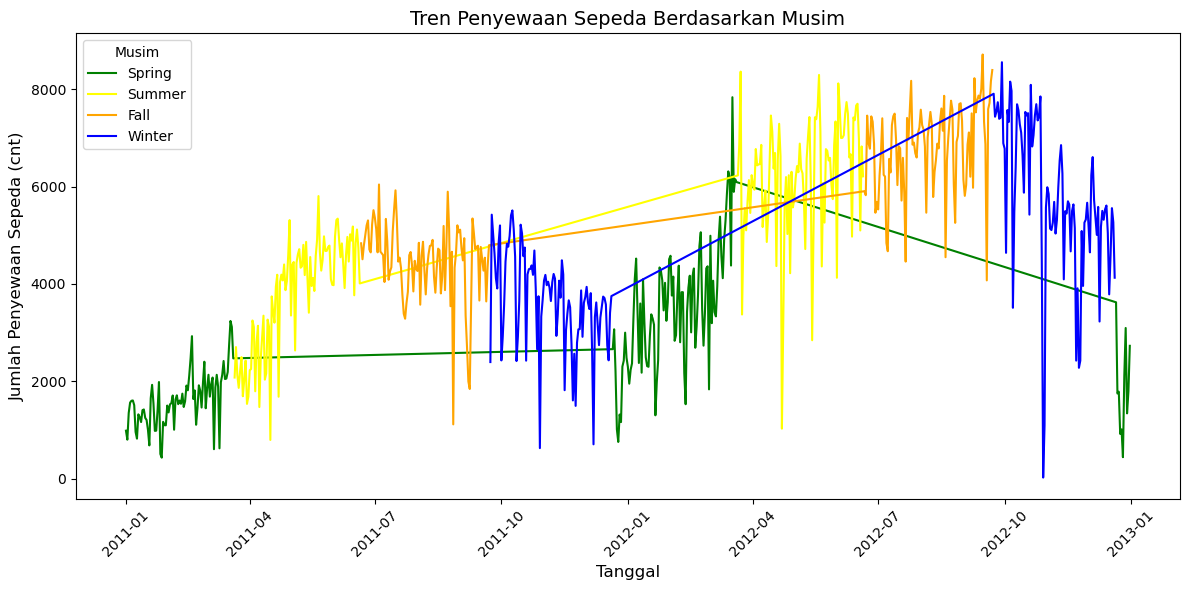

In [28]:
# Tren penyewaan berdasarkan musim
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_labels)

season_palette = {'Spring': 'green', 'Summer': 'yellow', 'Fall': 'orange', 'Winter': 'blue'}

plt.figure(figsize=(12,6))
sns.lineplot(x='dteday', y='cnt', hue='season_label', data=day_df, palette=season_palette)
plt.title('Tren Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)', fontsize=12)
plt.legend(title='Musim', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafik lineplot tersebut menunjukkan bahwa jumlah penyewa meningkat pada musim panas (Summer) dan puncaknya pada musim gugur (Fall) di setiap tahunnya.


## Analisis Lanjutan
### Clustering Pengguna Berdasarkan Musim dan Hari Kerja
Kita dapat mengelompokkan data berdasarkan musim dan hari kerja untuk memahami pola penyewaan lebih dalam.


 Musim  Holiday  Workingday
Spring        7         120
Summer        4         128
  Fall        4         131
Winter        6         121


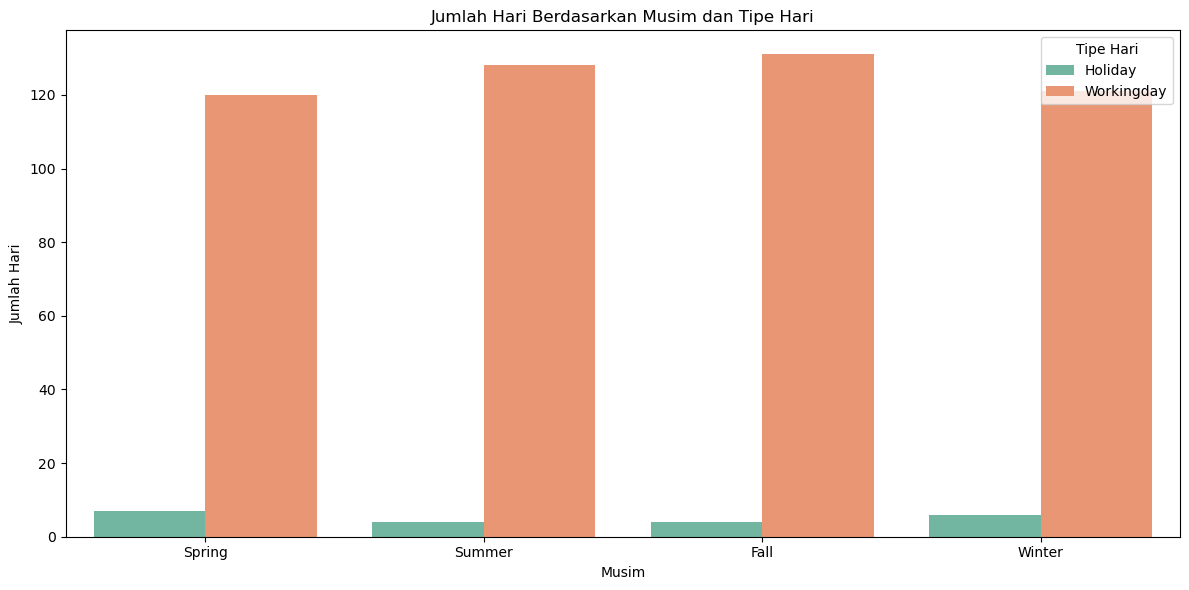

In [29]:
# Menghitung cluster berdasarkan musim dan hari kerja
day_df['cluster'] = np.where((day_df['season'] == 3) & (day_df['workingday'] == 1), 'High-Demand-Workday', 'Other')

# Menghitung jumlah hari untuk setiap musim
high_demand_counts = day_df[day_df['cluster'] == 'High-Demand-Workday'].groupby('season')['cluster'].count()

# Membuat DataFrame untuk menampilkan hasil
summary = pd.DataFrame({
    'Musim': ['Spring', 'Summer', 'Fall', 'Winter'],
    'Holiday': [
        day_df[(day_df['season'] == 1) & (day_df['holiday'] == 1)].shape[0],
        day_df[(day_df['season'] == 2) & (day_df['holiday'] == 1)].shape[0],
        day_df[(day_df['season'] == 3) & (day_df['holiday'] == 1)].shape[0],
        day_df[(day_df['season'] == 4) & (day_df['holiday'] == 1)].shape[0]
    ],
    'Workingday': [
        day_df[(day_df['season'] == 1) & (day_df['workingday'] == 1)].shape[0],
        day_df[(day_df['season'] == 2) & (day_df['workingday'] == 1)].shape[0],
        day_df[(day_df['season'] == 3) & (day_df['workingday'] == 1)].shape[0],
        day_df[(day_df['season'] == 4) & (day_df['workingday'] == 1)].shape[0]
    ]
})

# Menampilkan tabel tanpa indeks
print(summary.to_string(index=False))

# Melting DataFrame untuk mempermudah plotting
summary_melted = summary.melt(id_vars='Musim', value_vars=['Holiday', 'Workingday'],
                               var_name='Tipe Hari', value_name='Jumlah Hari')

# Menggambar bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_melted, x='Musim', y='Jumlah Hari', hue='Tipe Hari', palette='Set2')

# Menambahkan judul dan label
plt.title('Jumlah Hari Berdasarkan Musim dan Tipe Hari')
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')
plt.legend(title='Tipe Hari')
plt.tight_layout()
plt.show()


### Insight:
- Pengguna pada hari kerja di musim gugur memiliki permintaan tinggi, mencapai 131 pengguna (17.92%)..
- Pengelompokan berdasarkan musim dan hari kerja memberikan wawasan lebih dalam tentang perilaku penyewaan.



## Conclusion
- **Pertanyaan 1:** Cuaca memengaruhi jumlah penyewaan sepeda, terutama cuaca buruk yang mengurangi jumlah sewa.
- **Pertanyaan 2:** Penyewaan sepeda meningkat selama musim panas dan puncaknya pada musim gugur, sementara jumlah penyewaan menurun selama musim dingin.



### Export Data To main_data.csv file


In [30]:
day_df.to_csv('dashboard/main_data.csv', index=False)